<br><br><br>

<h1 style="color: purple" align="center"><b><u> LINEAR REGRESSION </u></b></h1>

<br><br><br><br>

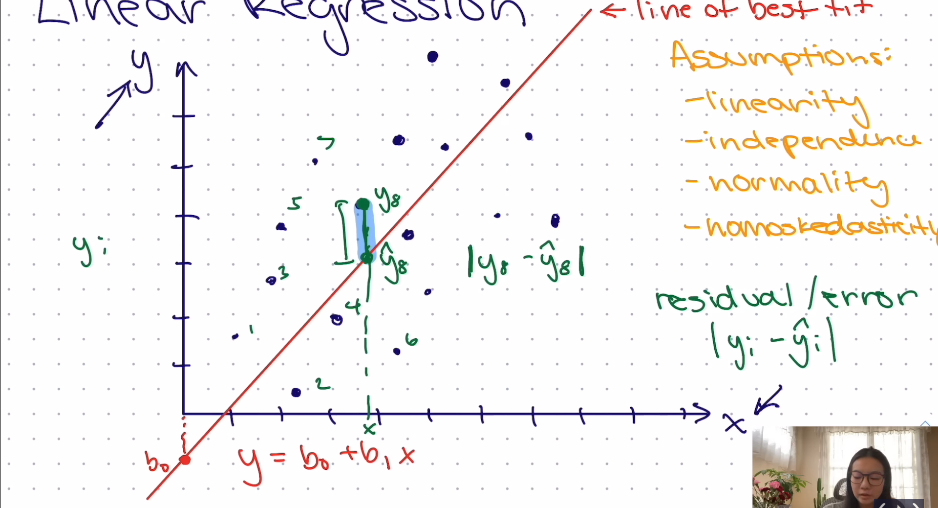
<br>

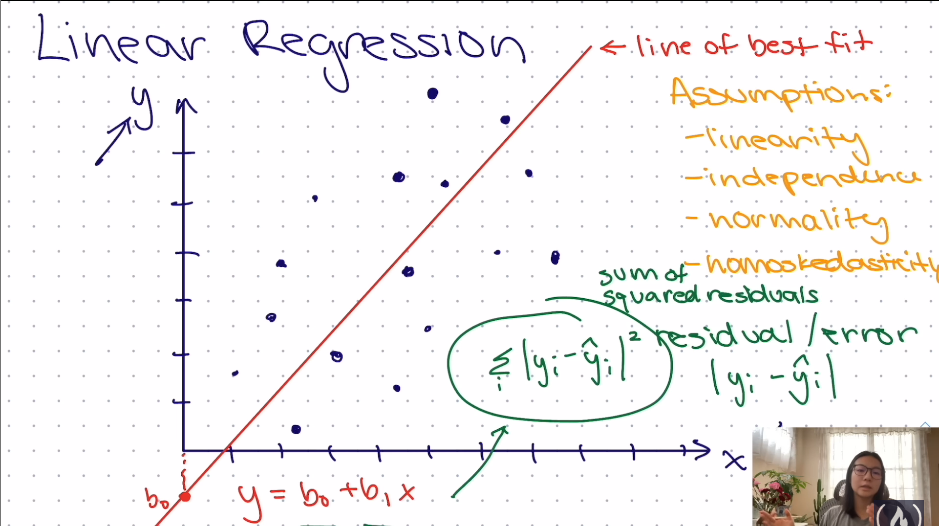
<br>

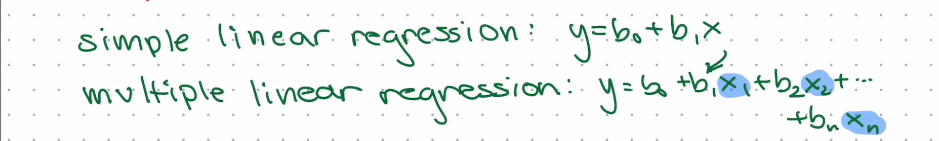
<br>

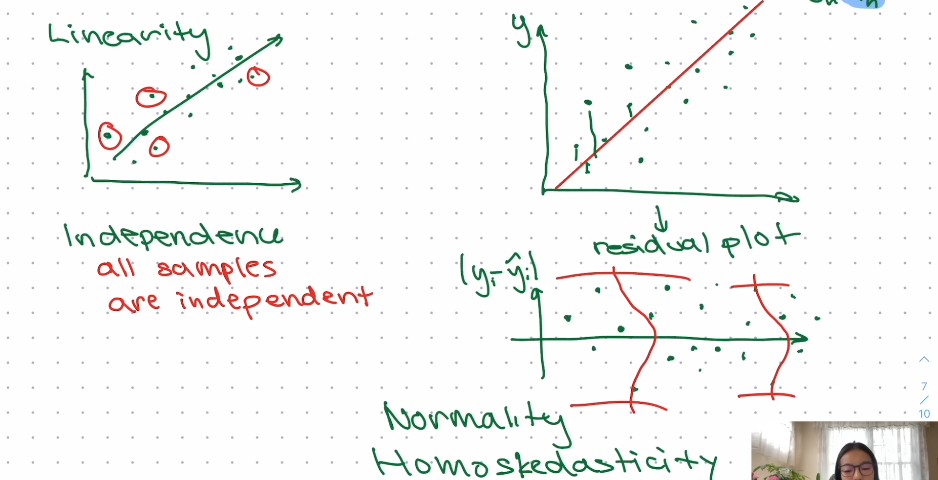
<br>

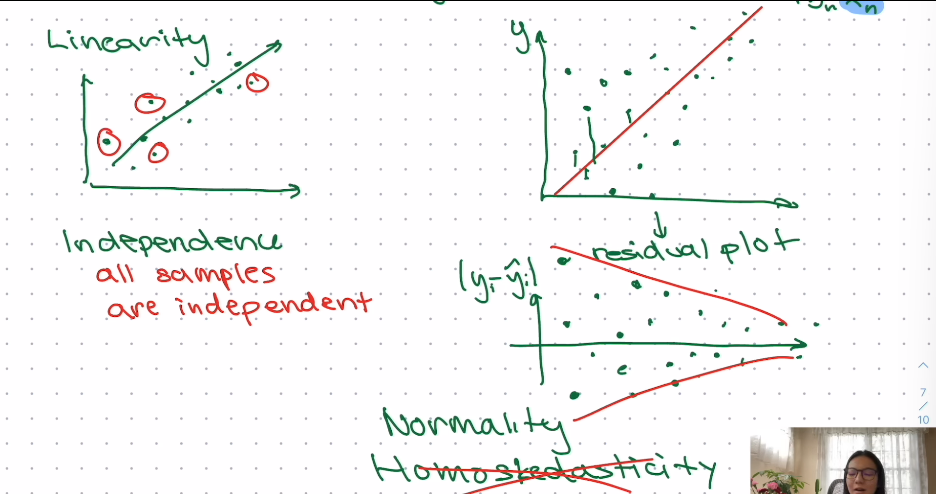
<br>

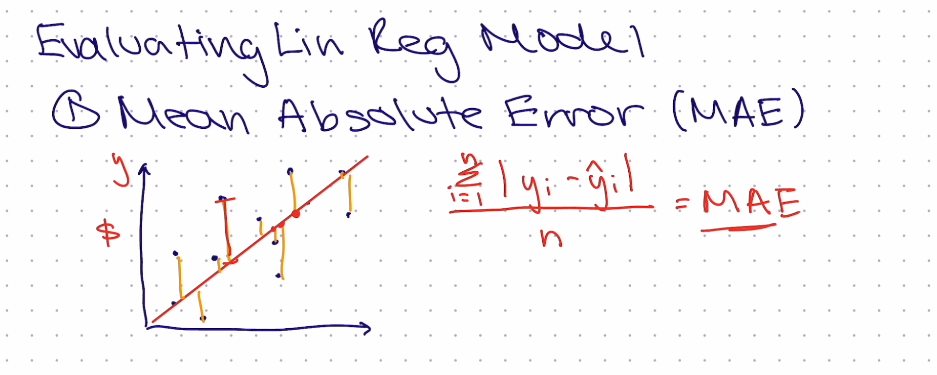
<br>

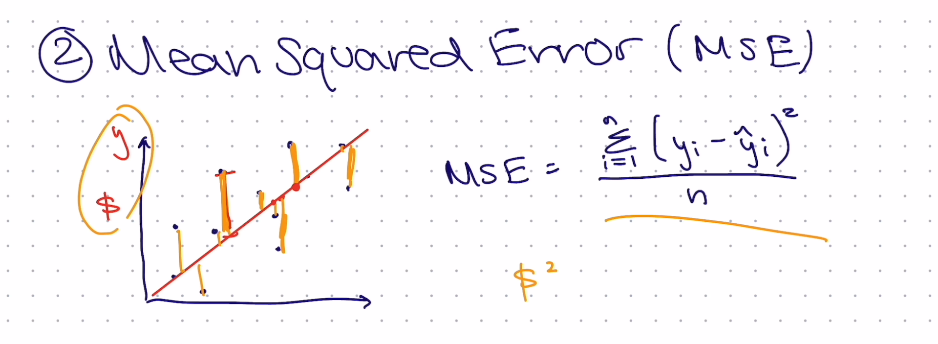
<br>

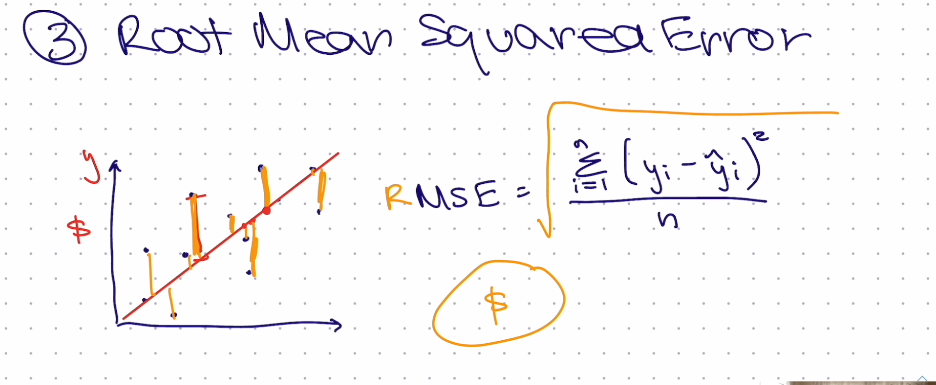
<br>

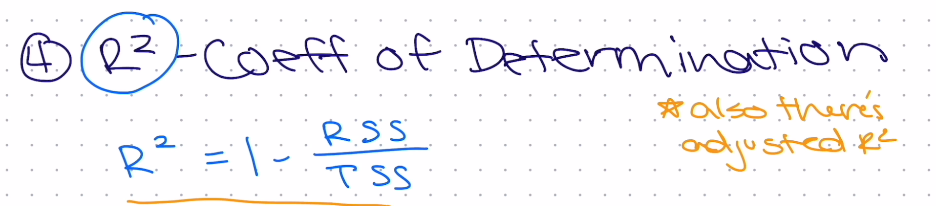
<br>

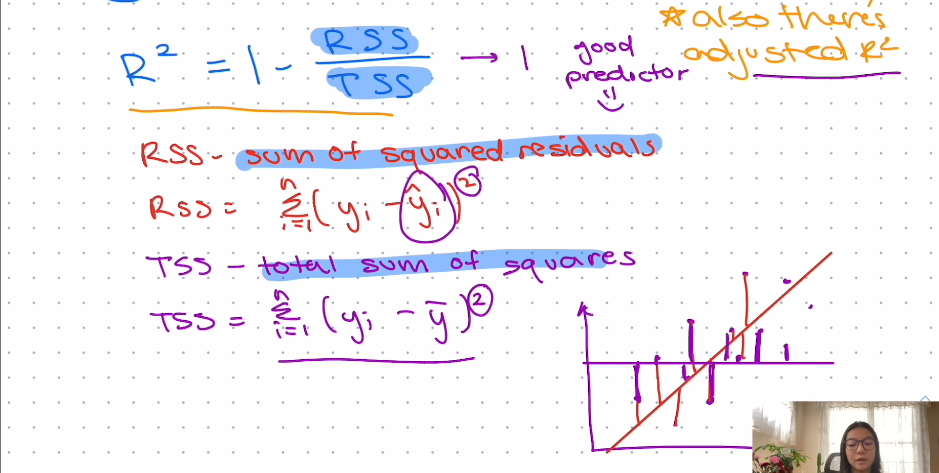
<br>
<br><br><br><br>

- **Importing The Neccessary Libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

<br><br><br>

- **Defining the dataset labels:**

In [2]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]

<br><br><br>

- **Reading the CSV dataset file**

In [3]:
pd.read_csv("SeoulBikeData.csv")

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30-11-2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30-11-2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30-11-2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30-11-2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


<br><br><br>

- **Dropping the unneccessary labels:**

In [4]:
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)

In [5]:
df.columns = dataset_cols

In [6]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


<br><br><br>

- **Making the Functional Column as 0 or 1 and dropping Hour column:**

In [7]:
df['functional'] = (df['functional'] == "Yes").astype(int)
df = df[df['hour'] == 12]
df = df.drop(['hour'], axis=1)

<br><br><br>

- **The New Dataset:**

In [8]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


<br><br><br>

- **Plotting all the above labels:**

<pre>
Here we may notice that the bike count does not appear linear w.r.t. some of these features.
</pre>

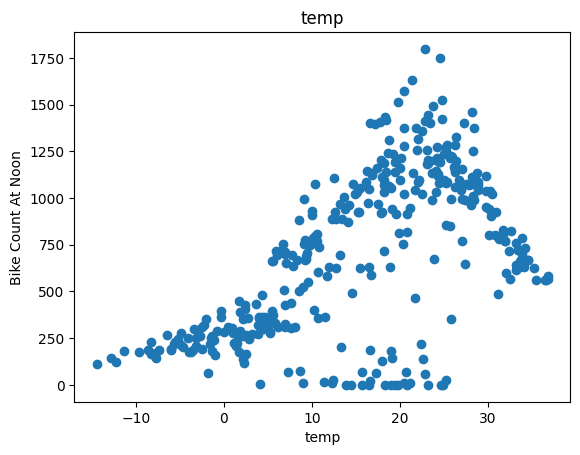

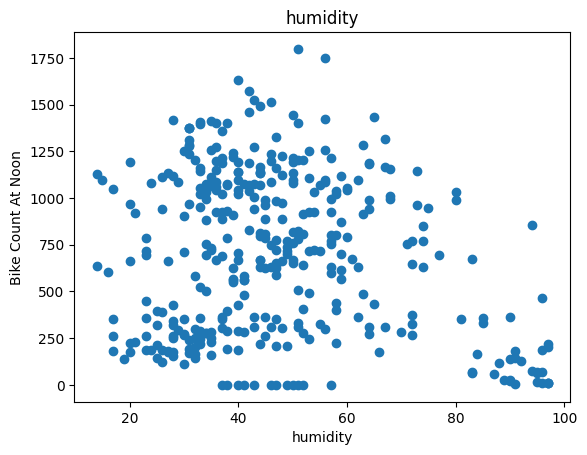

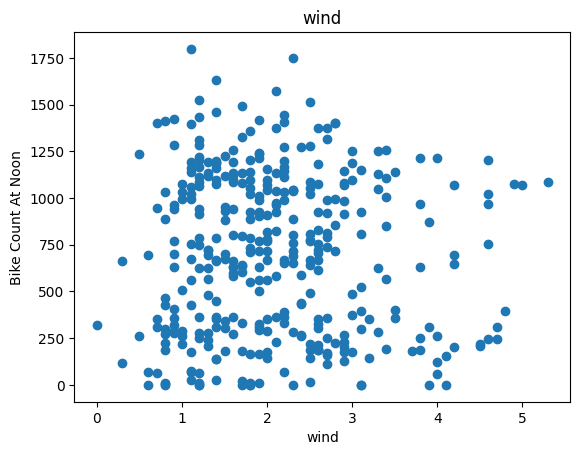

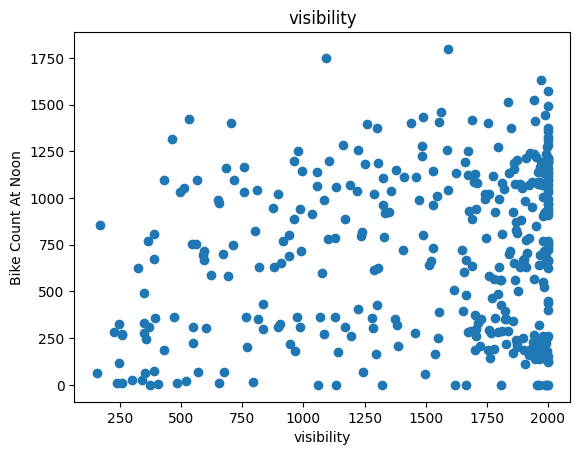

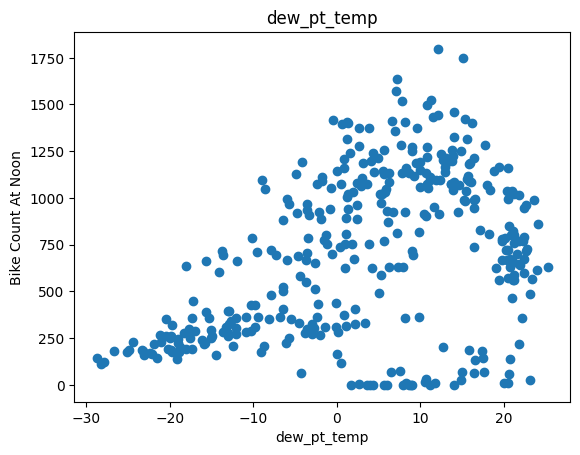

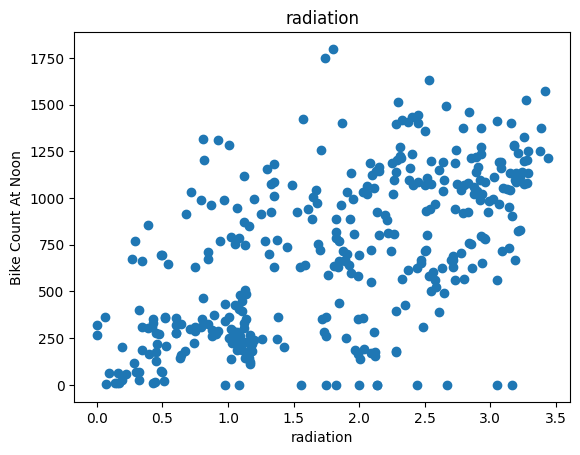

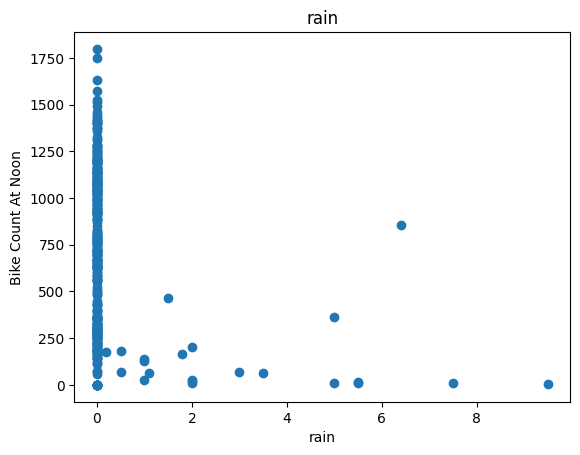

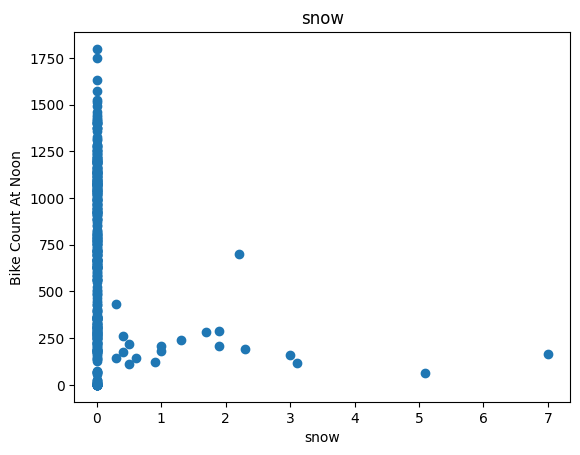

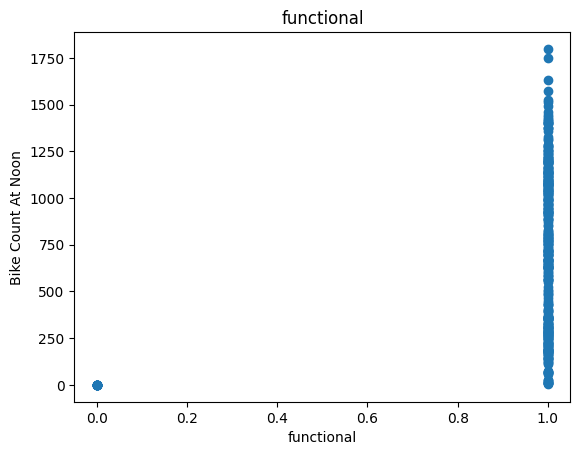

In [9]:
for label in df.columns[1:]:
    plt.scatter(df[label], df['bike_count'])
    plt.title(label)
    plt.ylabel("Bike Count At Noon")
    plt.xlabel(label)
    plt.show()
    

<br><br><br>
<pre>
So, we'll move forward to drop some of the labels that does not seems of much importance.
</pre>

In [10]:
df = df.drop(['wind', 'visibility', 'functional'], axis=1)

In [11]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


<br>
<br>
<br>

- **Splitting the dataset into TRAINING, VALIDATING and TESTING.**

In [ ]:
train , val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

<br>
<br>
<br>

- **We are not going to care about full grid, the full array.**
- **Therefore, we'll be using underscore for that.**

In [13]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y



In [14]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])


<br>
<br>
<br>

- **Just checking out simple Linear Regression**

In [15]:
temp_reg = LinearRegression()

In [16]:
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

<br>
<br>
<br>

- **Printing the regressor's coefficient and intercept.**

In [17]:
print(temp_reg.coef_, temp_reg.intercept_)

[[21.63718298]] [372.79806685]


<br>
<br>
<br>


- **Printing R square -> Coefficient of Determination**

In [18]:
temp_reg.score(X_test_temp, y_test_temp)

0.24200095984892933

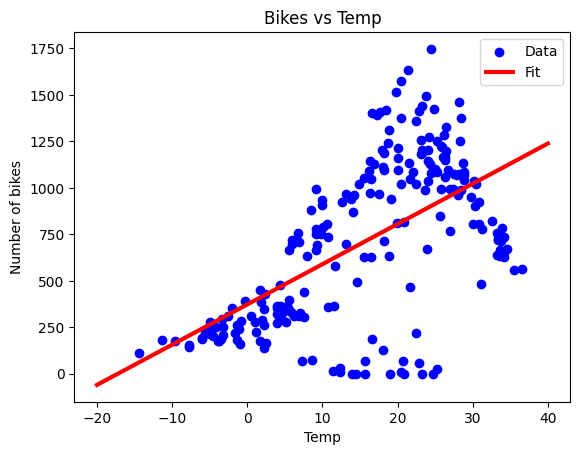

In [19]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

<br>
<br>
<br>

- **Multiple Linear Regression:**

In [20]:
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels= df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels= df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels= df.columns[1:])


In [21]:
all_reg = LinearRegression()

In [22]:
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [23]:
all_reg.score(X_test_all, y_test_all)

0.37756022632875585

<br><br><br>

<h1 style="color: purple" align="center"><b><u> NEURAL NETWORK </u></b></h1>

<br>
<br>
<br>

## Regression with Neural Network:

In [24]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [25]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [26]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [27]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [28]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)

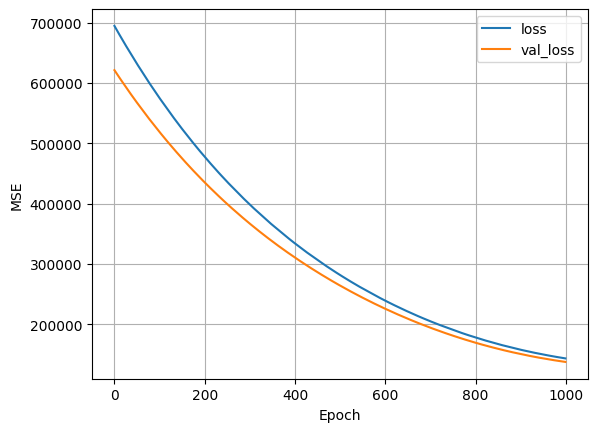

In [29]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


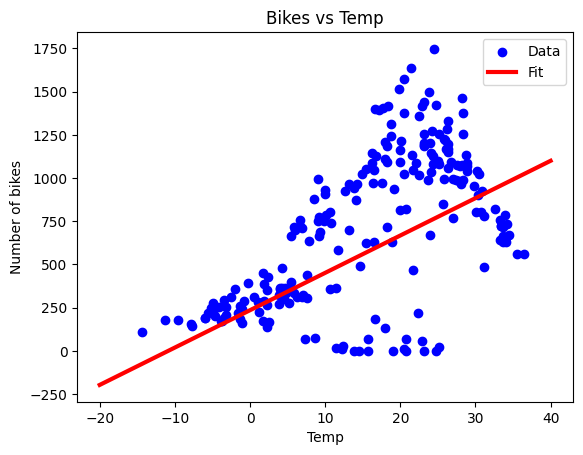

In [30]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

<br>
<br>
<br>
<br>


## NEURAL NETWORK:

In [31]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [32]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0, epochs=100
)

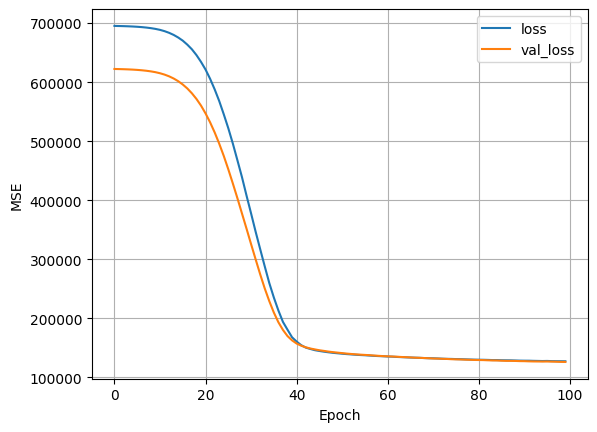

In [33]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


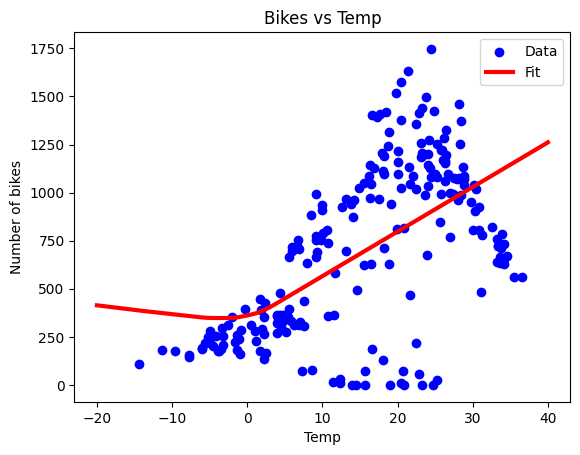

In [34]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [35]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

In [36]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [37]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

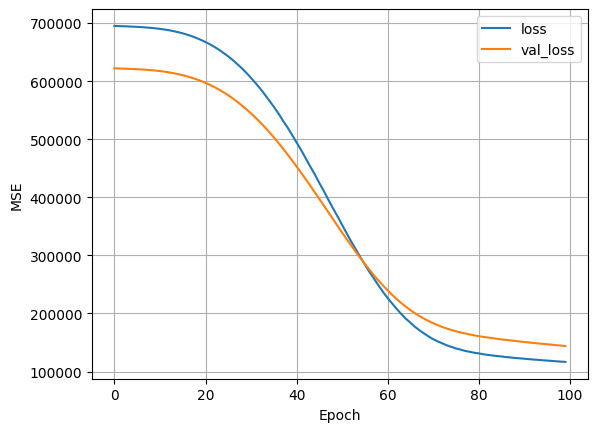

In [38]:
plot_loss(history)

<br><br><br><br>

## Calculating the MSE for the Linear Regression and Neural Network:

In [39]:
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 [==============================] - 0s 3ms/step


In [40]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [41]:
MSE(y_pred_lr, y_test_all)

103198.29009055835

In [42]:
MSE(y_pred_nn, y_test_all)

140418.2550204334

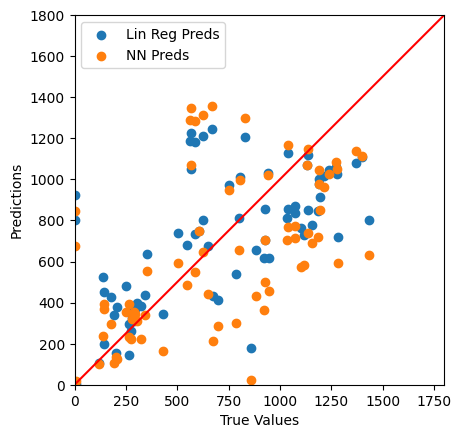

In [43]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")